In [1]:
require(data.table)
require(cowplot)
require(ggplot2)

Loading required package: data.table

Loading required package: cowplot

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: ggplot2



# Using datasets with intensity threshold set per field of view
And using all dots after field-based threshold application.
In other words, no matching was applied between any dataset.

In [2]:
dots_data = rbindlist(list(
    fread("../../data/60x_reference/dw.field_thr.tsv"),
    fread("../../data/60x_reference/raw.field_thr.tsv"),
    fread("../../data/magnifications_matching/20x_dw.field_thr.all.tsv"),
    fread("../../data/magnifications_matching/20x_raw.field_thr.all.tsv")
))

> Discarding fields #6 and #7

In [3]:
ddata = dots_data[sid <= 5]

In [4]:
pdata = ddata[, .N, by=c("magnification", "image_type", "sid", "nid", "size")]

## Statistics of DPN per dataset

In [5]:
print(pdata[, as.list(summary(N)), by=c("magnification", "image_type")])

   magnification image_type Min. 1st Qu. Median     Mean 3rd Qu. Max.
1:           60x         dw    1       2    7.0 14.45757   19.00  124
2:           60x        raw    1       2    8.0 14.90484   20.00  123
3:           20x         dw    1       3    7.0 12.64495   16.75   94
4:           20x        raw    1       5   13.5 22.57792   30.00  154


## Statistics of DPN per dataset

In [6]:
l = lapply(split(pdata, list(pdata$magnification, pdata$image_type)),
      function(ppdata) {
          out = ppdata[, as.list(summary(N)), by=c("magnification", "image_type", "sid")]
          print(ppdata[1, paste0(magnification, ".", image_type)])
          print(out)
          return(out)
      }
)

[1] "20x.dw"
   magnification image_type sid Min. 1st Qu. Median      Mean 3rd Qu. Max.
1:           20x         dw   1    1       2      6 11.313043    16.5   76
2:           20x         dw   2    1       3      7 12.917910    17.0   94
3:           20x         dw   3    1       2      4  9.773196    11.0   87
4:           20x         dw   4    1       3      7 13.017094    15.0   63
5:           20x         dw   5    1       3      8 14.973510    19.5   70
[1] "60x.dw"
   magnification image_type sid Min. 1st Qu. Median     Mean 3rd Qu. Max.
1:           60x         dw   1    1       2      6 12.27928   16.50   83
2:           60x         dw   2    1       3      9 15.80952   20.75  124
3:           60x         dw   3    1       2      4 11.00000   13.75  114
4:           60x         dw   4    1       2      7 14.03419   17.00   78
5:           60x         dw   5    1       3      9 17.54362   23.00   97
[1] "20x.raw"
   magnification image_type sid Min. 1st Qu. Median     Mean 3rd Q

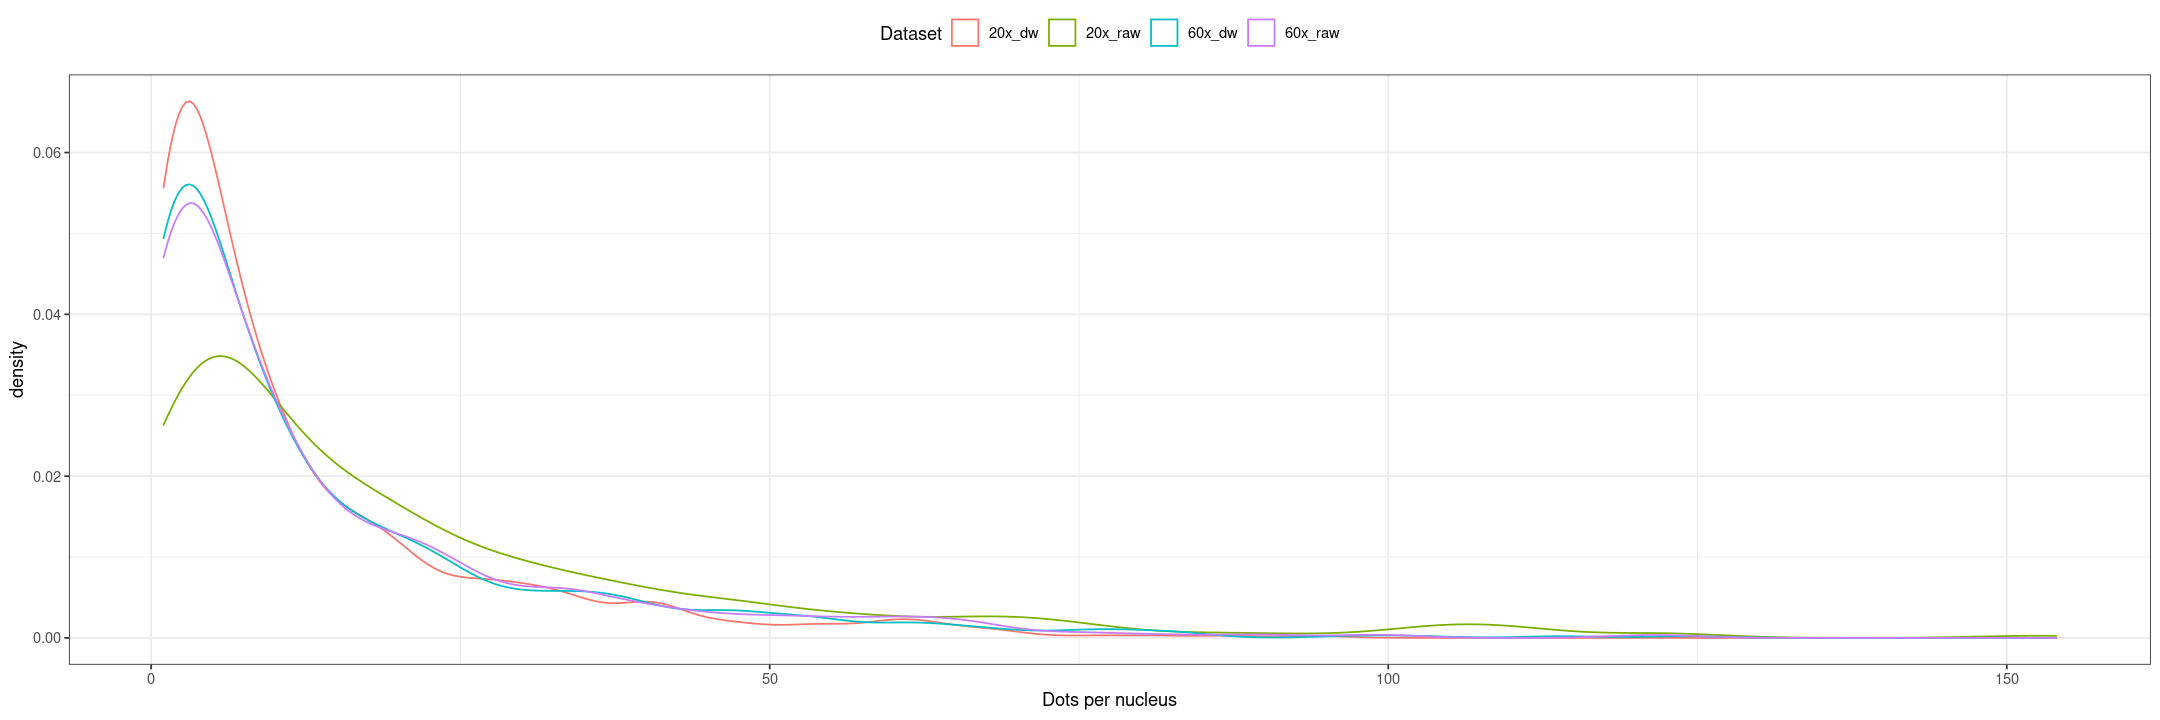

In [7]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(pdata, aes(x=N, color=paste0(magnification, "_", image_type))) + geom_density() +
    theme_bw() + theme(legend.position="top") + guides(color=guide_legend("Dataset")) +
    labs(x="Dots per nucleus")

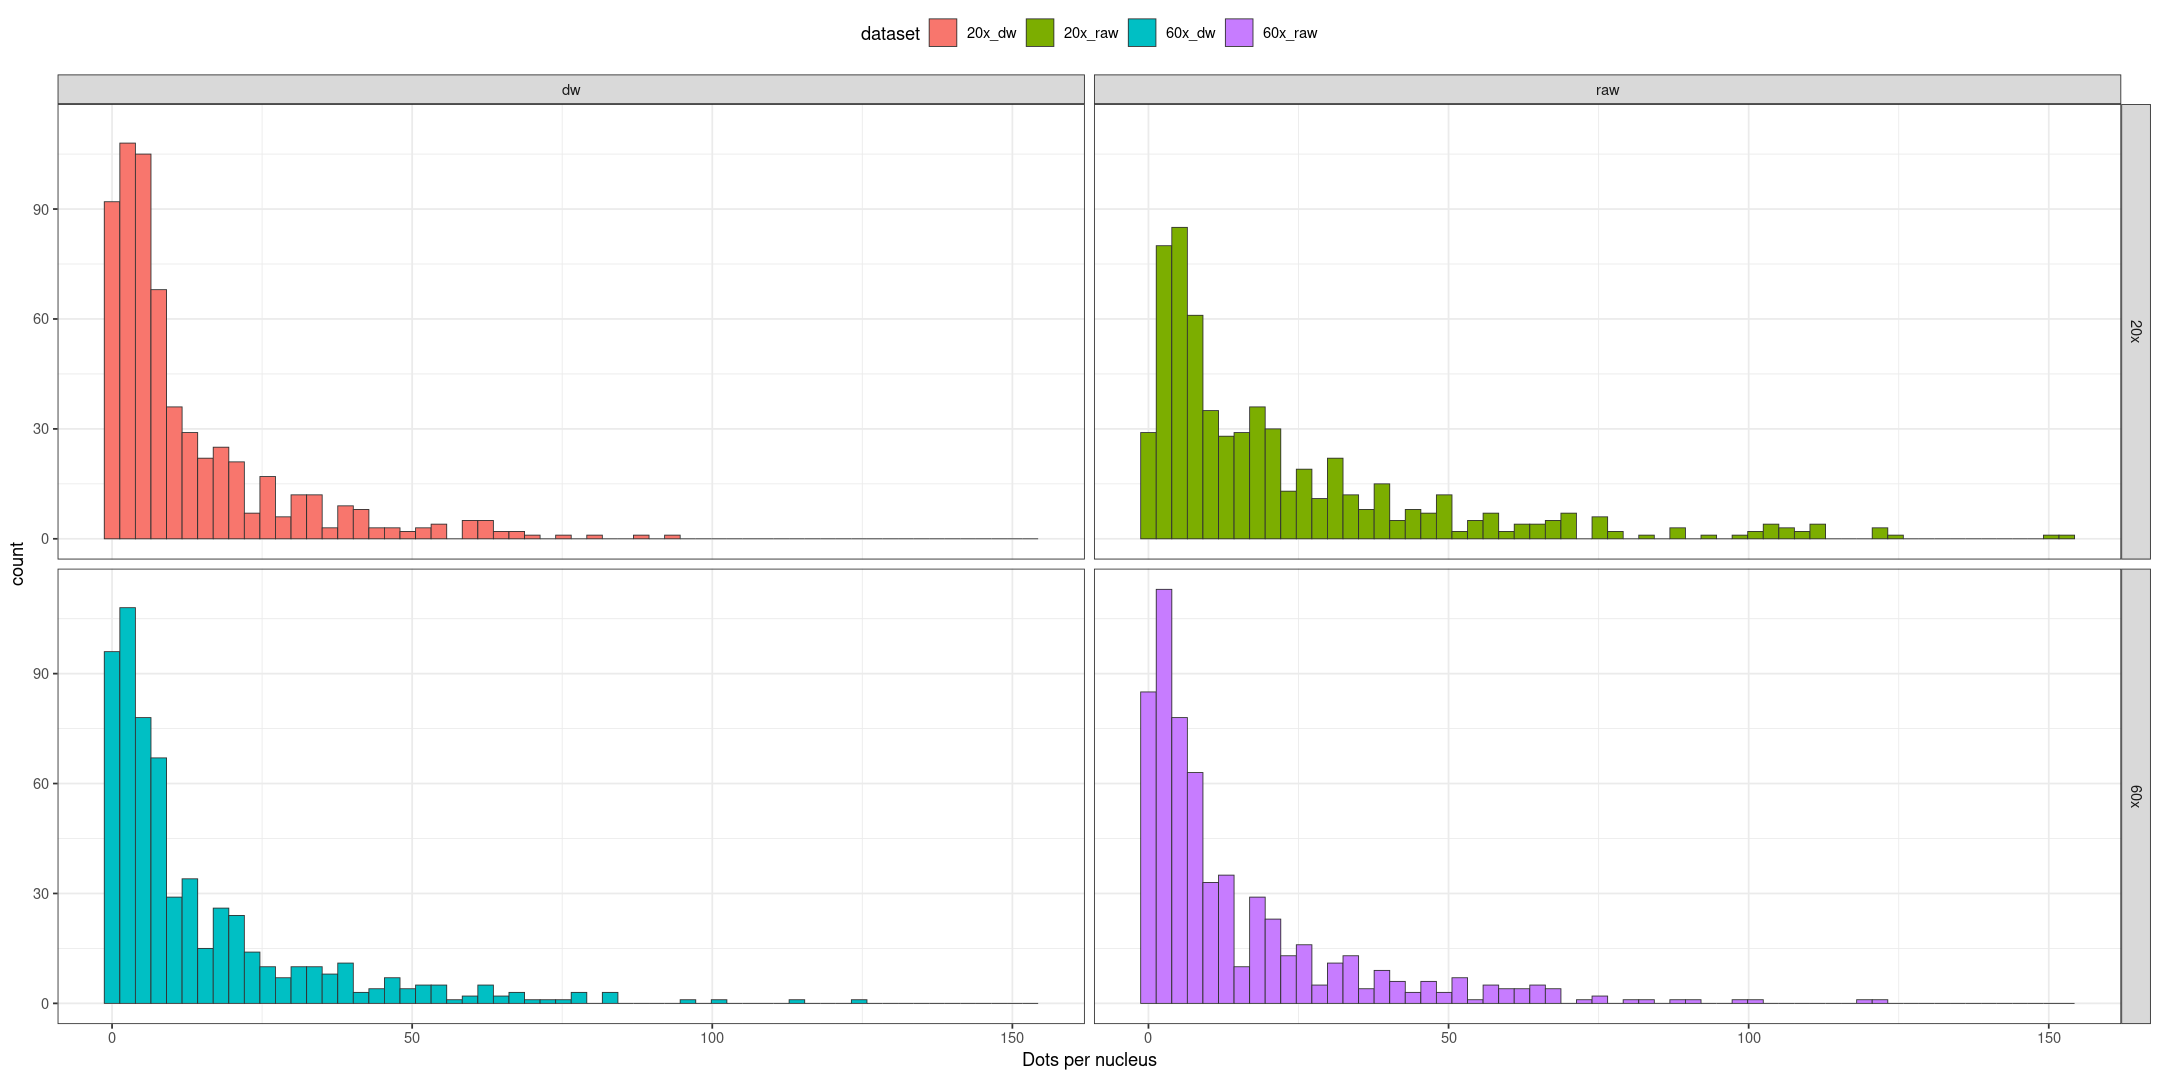

In [8]:
options(repr.plot.width=18, repr.plot.height=9)
ggplot(pdata, aes(x=N, fill=paste0(magnification, "_", image_type))) +
    geom_histogram(bins=60, color="#323232", size=.25) +
    theme_bw() + theme(legend.position="top") + guides(fill=guide_legend("dataset")) +
    labs(x="Dots per nucleus") + facet_grid(~magnification~image_type)

## DPN and nuclear size

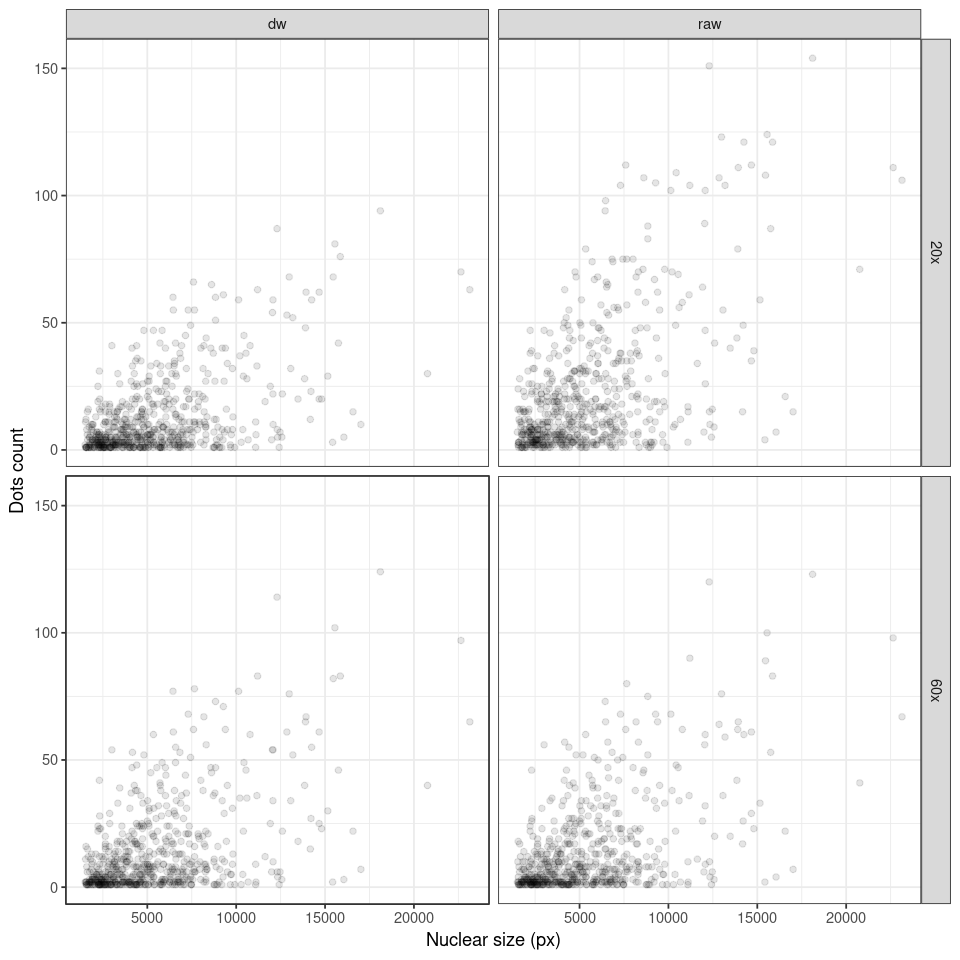

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(pdata, aes(size, N)) + geom_point(alpha=.1) +
    facet_grid(~magnification~image_type) + theme_bw() +
labs(x="Nuclear size (px)", y="Dots count")

In [10]:
ppdata = dcast(pdata, sid+nid+size~magnification+image_type, value.var="N")

In [11]:
p1 = ggplot(ppdata, aes(`60x_dw`, `60x_raw`, color=size)) + geom_point() +
    theme_bw() + coord_fixed(xlim=c(0, 120), ylim=c(0, 120)) +
    labs(title="Comparison of dots per nuclei count.")
p2 = ggplot(ppdata, aes(`60x_dw`, `20x_raw`, color=size)) + geom_point() +
    theme_bw() + coord_fixed(xlim=c(0, 120), ylim=c(0, 120)) +
    labs(title="Comparison of dots per nuclei count.")
p3 = ggplot(ppdata, aes(`60x_dw`, `20x_dw`, color=size)) + geom_point() +
    theme_bw() + coord_fixed(xlim=c(0, 120), ylim=c(0, 120)) +
    labs(title="Comparison of dots per nuclei count.")

Warning message:
“Removed 66 rows containing missing values (geom_point).”
Warning message:
“Removed 98 rows containing missing values (geom_point).”
Warning message:
“Removed 95 rows containing missing values (geom_point).”


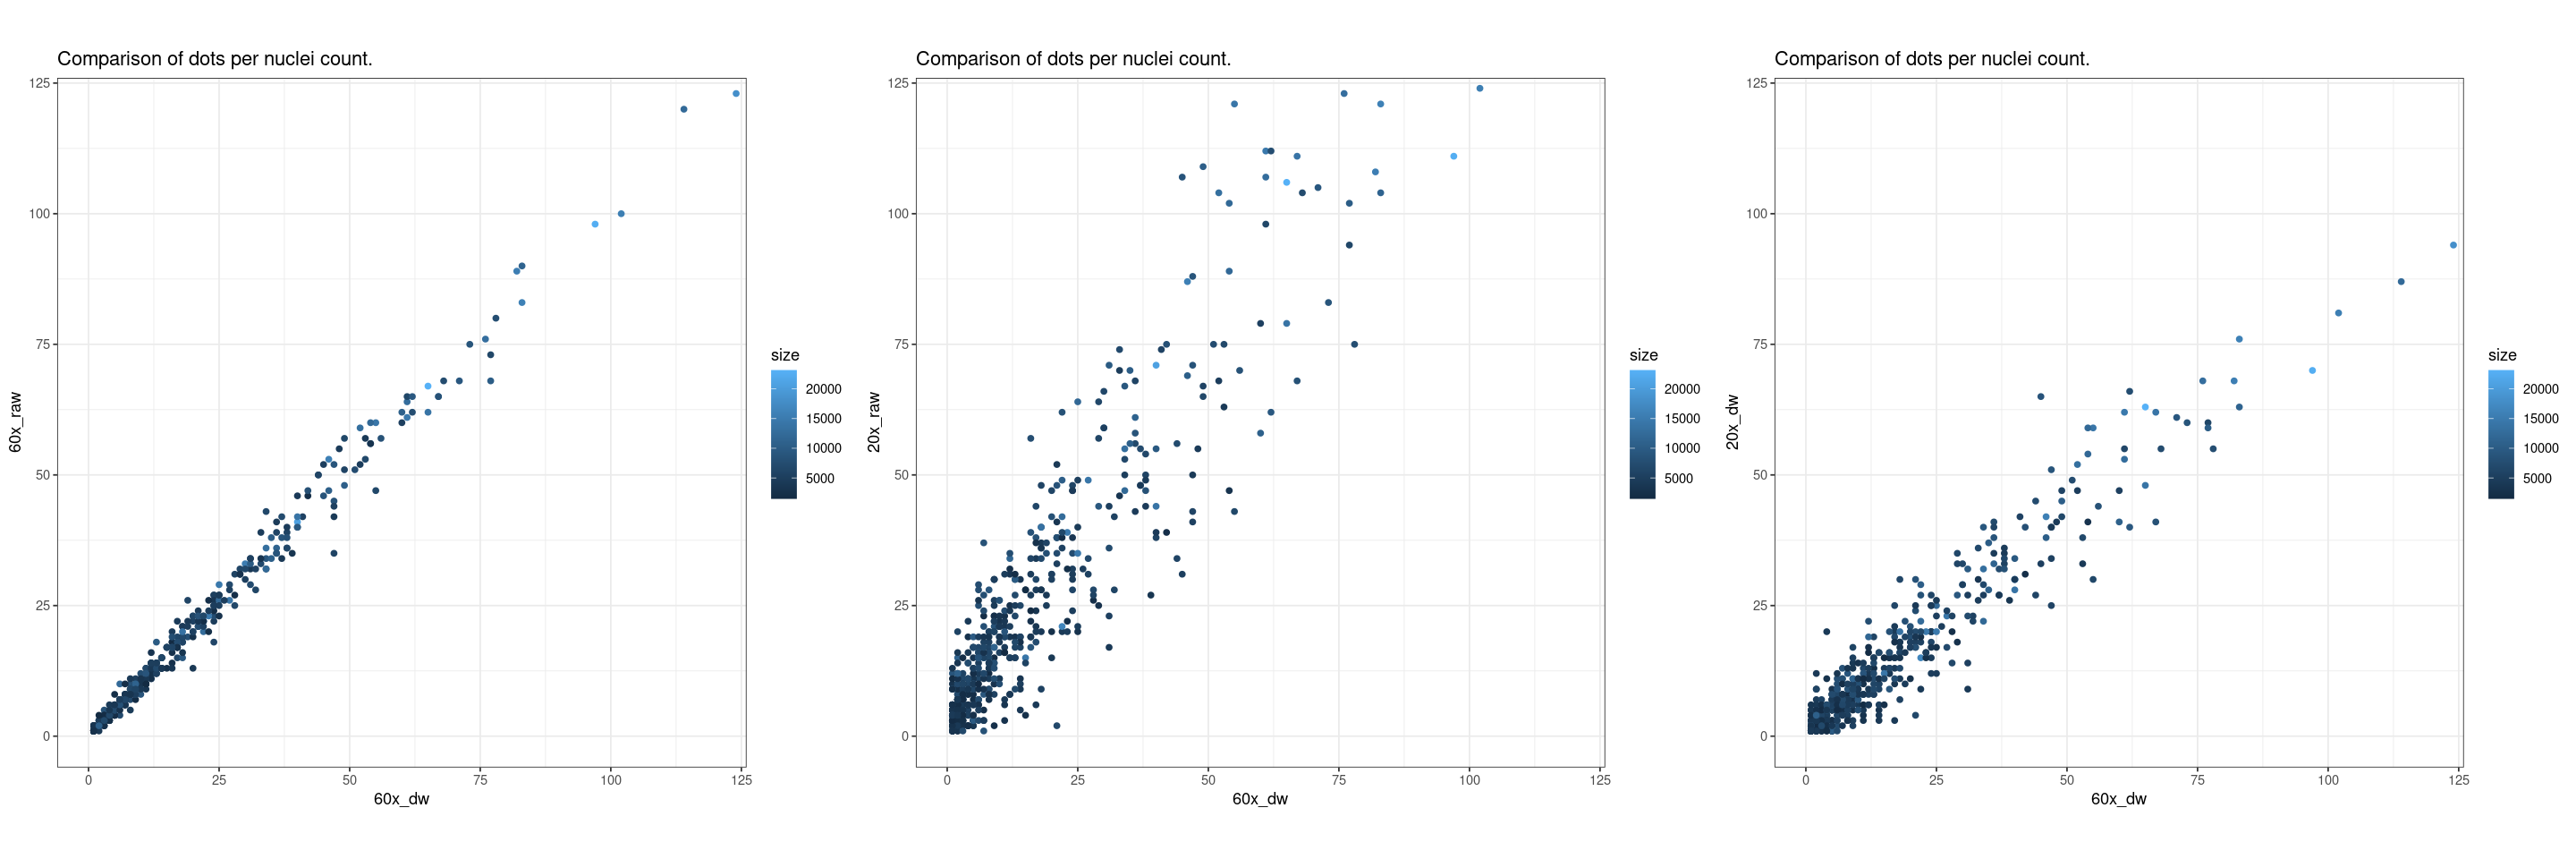

In [12]:
options(repr.plot.width=24, repr.plot.height=8)
plot_grid(p1, p2, p3, nrow=1)

In [13]:
pcc = cor(ppdata[, 4:ncol(ppdata)], use="pairwise.complete.obs")
print(pcc)
scc = cor(ppdata[, 4:ncol(ppdata)], use="pairwise.complete.obs", method="spearman")
print(scc)

           20x_dw   20x_raw    60x_dw   60x_raw
20x_dw  1.0000000 0.9717834 0.9608556 0.9619620
20x_raw 0.9717834 1.0000000 0.9257992 0.9286072
60x_dw  0.9608556 0.9257992 1.0000000 0.9953107
60x_raw 0.9619620 0.9286072 0.9953107 1.0000000
           20x_dw   20x_raw    60x_dw   60x_raw
20x_dw  1.0000000 0.9497913 0.9171150 0.9151281
20x_raw 0.9497913 1.0000000 0.8819924 0.8806877
60x_dw  0.9171150 0.8819924 1.0000000 0.9939930
60x_raw 0.9151281 0.8806877 0.9939930 1.0000000
